In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42)

In [2]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)

best_model = max(scores, key=scores.get)
print("Model Accuracy Scores:", scores)
print(f"Best Model: {best_model}")

Model Accuracy Scores: {'Logistic Regression': 1.0, 'SVM': 1.0, 'Random Forest': 1.0, 'Decision Tree': 1.0}
Best Model: Logistic Regression


In [3]:
for name, model in models.items():
    cv_scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print(f"{name} Cross-validation scores: {cv_scores.mean():.4f}")

Logistic Regression Cross-validation scores: 0.9733
SVM Cross-validation scores: 0.9667
Random Forest Cross-validation scores: 0.9600
Decision Tree Cross-validation scores: 0.9667


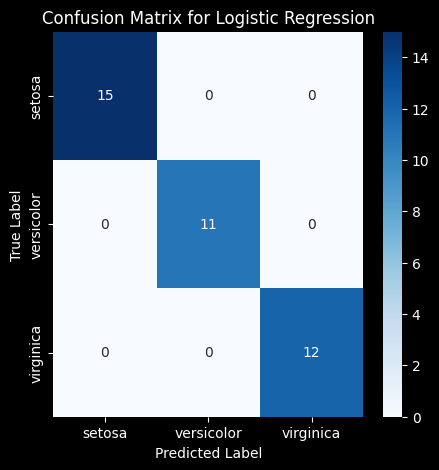

In [4]:
best_clf = models[best_model]
y_pred_best = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {best_model}")
plt.show()